<a href="https://colab.research.google.com/github/5ury4pr454th/fmml-labs/blob/master/Module9_Lab2_FMML20210108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Neural Networks: MLP and Back-propagation
# Module Coordinator: Pranav Kirsur

# Lab 2: Using MLP for multiclass classification

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Wed Jun 29 09:18:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data preparation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

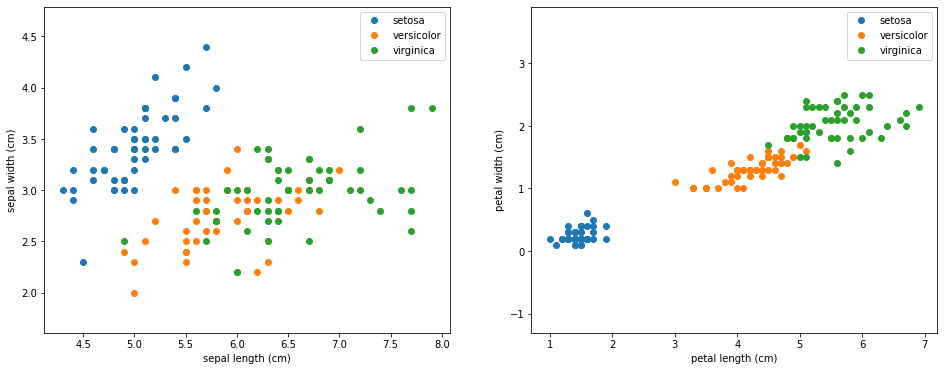

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are 3 classes, setosa, versicolor, and virginica.

There are 4 features, sepal width, sepal length, petal width, petal length.

# MLP for multiclass classification

In [5]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [6]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [7]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [8]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list_m0     = np.zeros((EPOCHS,))
accuracy_list_m0 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m0[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m0[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 412.31it/s]


# Plot training progress

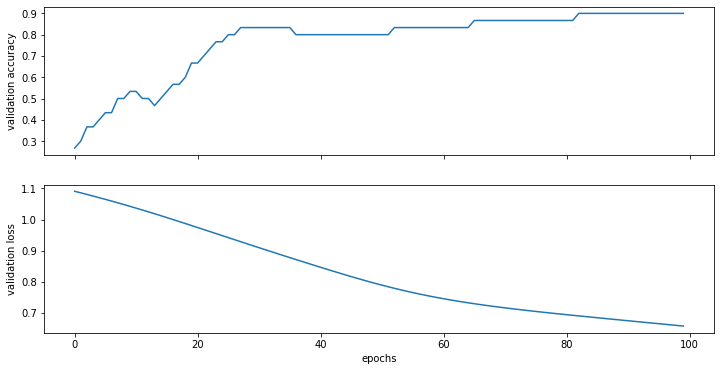

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m0)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m0)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

### Answer 1
we try to increase the number of hidden layers by 1 additional layer and observe the changes

In [21]:
# Defining the model architecture
class Model_1(nn.Module):
    def __init__(self, input_dim):
        super(Model_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = Model_1(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [22]:
# Train for 100 epochs
EPOCHS  = 100

loss_list_m1     = np.zeros((EPOCHS,))
accuracy_list_m1 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m1[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m1[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 1114.75it/s]


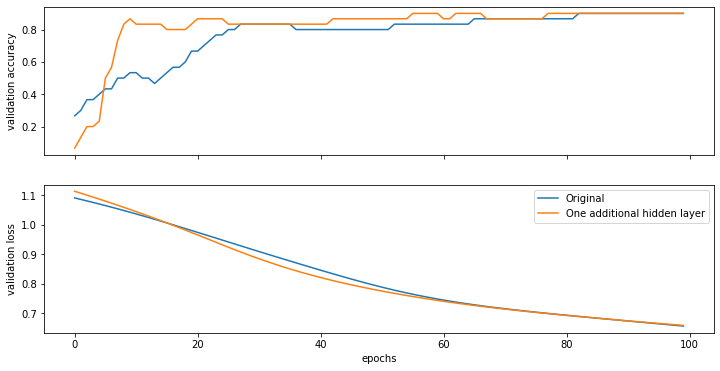

In [23]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m0, label = 'Original')
ax1.plot(accuracy_list_m1, label = 'One additional hidden layer')
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m0,  label = 'Original')
ax2.plot(loss_list_m1,  label = 'One additional hidden layer')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.legend()
plt.show()

the accuracy increases sooner and the loss decreases rapidly but if we increase it too much, the model will overfit...

In [27]:
# Defining the model architecture
class Model_1(nn.Module):
    def __init__(self, input_dim):
        super(Model_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = Model_1(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [28]:
# Train for 100 epochs
EPOCHS  = 100

loss_list_m1_2     = np.zeros((EPOCHS,))
accuracy_list_m1_2 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m1_2[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m1_2[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 1070.91it/s]


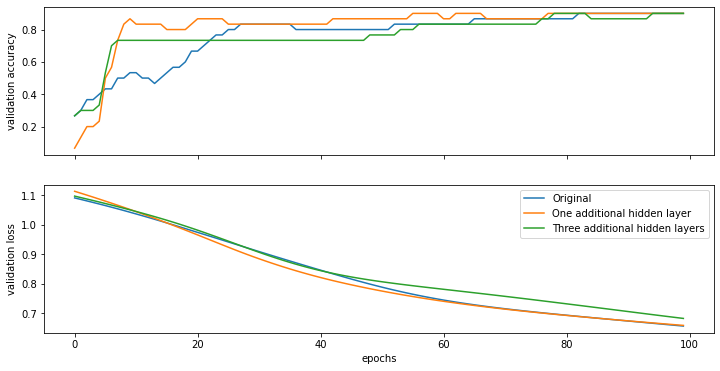

In [29]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m0, label = 'Original')
ax1.plot(accuracy_list_m1, label = 'One additional hidden layer')
ax1.plot(accuracy_list_m1_2, label = 'Three additional hidden layers')
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m0,  label = 'Original')
ax2.plot(loss_list_m1,  label = 'One additional hidden layer')
ax2.plot(loss_list_m1_2,  label = 'Three additional hidden layers')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.legend()
plt.show()

Here, clearly, the loss has increased

### Answer 2
If we increase the number of neurons, then ...

In [39]:
# Defining the model architecture
class Model_2(nn.Module):
    def __init__(self, input_dim):
        super(Model_2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = Model_2(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [40]:
# Train for 100 epochs
EPOCHS  = 100

loss_list_m2     = np.zeros((EPOCHS,))
accuracy_list_m2 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m2[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m2[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 801.92it/s]


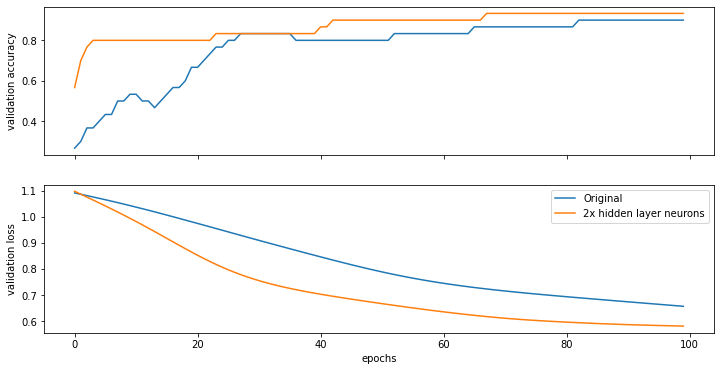

In [41]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m0, label = 'Original')
ax1.plot(accuracy_list_m2, label = '2x hidden layer neurons')
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m0,  label = 'Original')
ax2.plot(loss_list_m2,  label = '2x hidden layer neurons')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.legend()
plt.show()

The accuracy increases very well and the loss is minimized much better, further increasing...

In [55]:
# Defining the model architecture
class Model_2(nn.Module):
    def __init__(self, input_dim):
        super(Model_2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 500)
        self.layer2 = nn.Linear(500, 500)
        self.layer3 = nn.Linear(500, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = Model_2(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [56]:
# Train for 100 epochs
EPOCHS  = 100

loss_list_m2_2     = np.zeros((EPOCHS,))
accuracy_list_m2_2 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m2_2[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m2_2[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 181.91it/s]


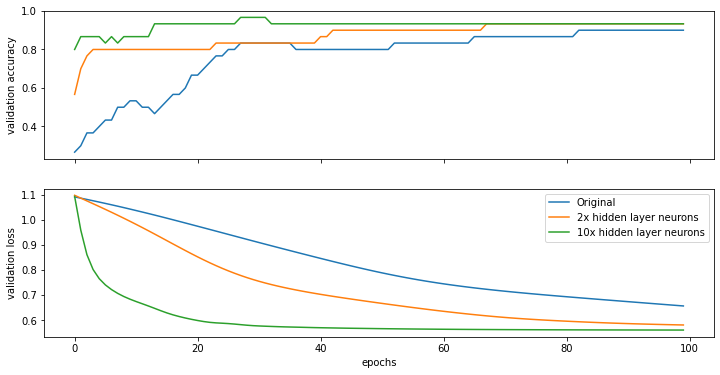

In [57]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m0, label = 'Original')
ax1.plot(accuracy_list_m2, label = '2x hidden layer neurons')
ax1.plot(accuracy_list_m2_2, label = '10x hidden layer neurons')
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m0,  label = 'Original')
ax2.plot(loss_list_m2,  label = '2x hidden layer neurons')
ax2.plot(loss_list_m2_2, label = '10x hidden layer neurons')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.legend()
plt.show()

it increases, but if we increase it too much...

In [49]:
# Defining the model architecture
class Model_2(nn.Module):
    def __init__(self, input_dim):
        super(Model_2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 5000)
        self.layer2 = nn.Linear(5000, 5000)
        self.layer3 = nn.Linear(5000, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = Model_2(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [50]:
# Train for 100 epochs
EPOCHS  = 100

loss_list_m2_3     = np.zeros((EPOCHS,))
accuracy_list_m2_3 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m2_3[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m2_3[epoch] = correct.mean()

100%|██████████| 100/100 [03:07<00:00,  1.88s/it]


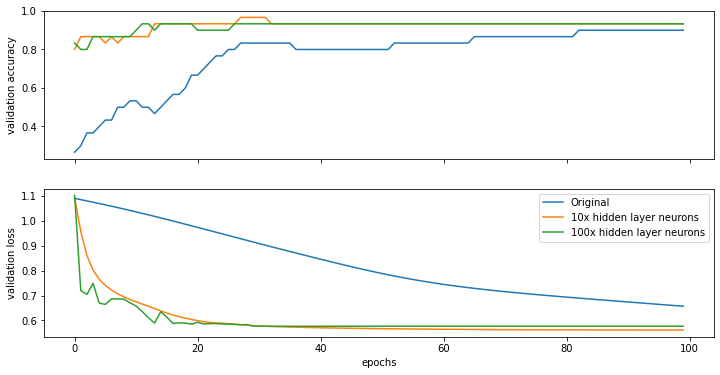

In [58]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m0, label = 'Original')
ax1.plot(accuracy_list_m2_2, label = '10x hidden layer neurons')
ax1.plot(accuracy_list_m2_3, label = '100x hidden layer neurons')
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m0,  label = 'Original')
ax2.plot(loss_list_m2_2,  label = '10x hidden layer neurons')
ax2.plot(loss_list_m2_3, label = '100x hidden layer neurons')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.legend()
plt.show()

it starts performing worse.

### Answer 3

In [64]:
# Defining the model architecture
class Model_relu(nn.Module):
    def __init__(self, input_dim):
        super(Model_relu, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

class Model_leaky_relu(nn.Module):
    def __init__(self, input_dim):
        super(Model_leaky_relu, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.leaky_relu(self.layer1(x))
        x = F.leaky_relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

class Model_tanh(nn.Module):
    def __init__(self, input_dim):
        super(Model_tanh, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.tanh(self.layer1(x))
        x = F.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x
        
class Model_sigmoid(nn.Module):
    def __init__(self, input_dim):
        super(Model_sigmoid, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.sigmoid(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model_relu     = Model_relu(X_train.shape[1])
optimizer_relu = torch.optim.Adam(model_relu.parameters(), lr=0.001)

model_leaky_relu     = Model_leaky_relu(X_train.shape[1])
optimizer_leaky_relu = torch.optim.Adam(model_leaky_relu.parameters(), lr=0.001)

model_tanh     = Model_tanh(X_train.shape[1])
optimizer_tanh = torch.optim.Adam(model_tanh.parameters(), lr=0.001)

model_sigmoid     = Model_sigmoid(X_train.shape[1])
optimizer_sigmoid = torch.optim.Adam(model_sigmoid.parameters(), lr=0.001)


In [67]:
# Train for 100 epochs
EPOCHS  = 100

loss_list_m3_0     = np.zeros((EPOCHS,))
accuracy_list_m3_0 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model_relu(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m3_0[epoch] = loss.item()
    
    # Zero gradients
    optimizer_relu.zero_grad()
    loss.backward()
    optimizer_relu.step()
    
    with torch.no_grad():
        y_pred = model_relu(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m3_0[epoch] = correct.mean()

loss_list_m3_1     = np.zeros((EPOCHS,))
accuracy_list_m3_1 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model_leaky_relu(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m3_1[epoch] = loss.item()
    
    # Zero gradients
    optimizer_leaky_relu.zero_grad()
    loss.backward()
    optimizer_leaky_relu.step()
    
    with torch.no_grad():
        y_pred = model_leaky_relu(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m3_1[epoch] = correct.mean()

loss_list_m3_2 = np.zeros((EPOCHS,))
accuracy_list_m3_2 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model_tanh(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m3_2[epoch] = loss.item()
    
    # Zero gradients
    optimizer_tanh.zero_grad()
    loss.backward()
    optimizer_tanh.step()
    
    with torch.no_grad():
        y_pred = model_tanh(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m3_2[epoch] = correct.mean()

loss_list_m3_3     = np.zeros((EPOCHS,))
accuracy_list_m3_3 = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model_sigmoid(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list_m3_3[epoch] = loss.item()
    
    # Zero gradients
    optimizer_sigmoid.zero_grad()
    loss.backward()
    optimizer_sigmoid.step()
    
    with torch.no_grad():
        y_pred = model_sigmoid(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_m3_3[epoch] = correct.mean()

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 100/100 [00:00<00:00, 637.02it/s]


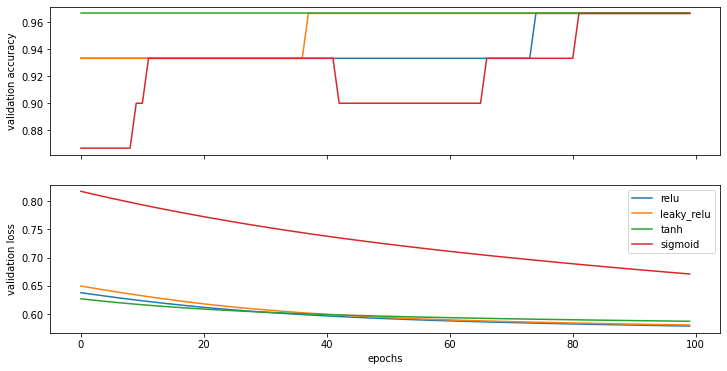

In [68]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_m3_0, label = 'relu')
ax1.plot(accuracy_list_m3_1, label = 'leaky_relu')
ax1.plot(accuracy_list_m3_2, label = 'tanh')
ax1.plot(accuracy_list_m3_3, label = 'sigmoid')
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list_m3_0, label = 'relu')
ax2.plot(loss_list_m3_1, label = 'leaky_relu')
ax2.plot(loss_list_m3_2,  label = 'tanh')
ax2.plot(loss_list_m3_3, label = 'sigmoid')
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.legend()
plt.show()

sigmoid performs the worst. other activation functions perform almost the same. Ultimately, relu seems to be the best fit...